### Nike Sales-2024
For this project, we will make an analysis of Nike sales during 2024, paying attention to certain parameters like sales on different regions to find insights about the causes of
such successes.
In this case, we will make an EDA(exploratory data analysis) using Plotly, Pandas and cofflinks.This last one help us to establish a better communication between Pandas and Plotly.

### Tools used:

#### Pandas
#### Seaborn
#### Matplotlib


In [48]:
#Import the libraries 
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv(r"C:\Users\CR\Desktop\datasets_used\data_visualizations\nike_sales_2024.csv")

### Fist rows of the dataset

In [14]:
#First rows of our dataset
df.head()

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160


### Statistic summary of the dataset

In [15]:
#Statistical analysis of our data
df.describe()

,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
count,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,28498.951000,5.039576e+06,70.040000,176.32000
std,12926.495678,3.267217e+06,11.748635,75.26169
min,5028.000000,2.874000e+05,50.000000,50.00000
25%,17554.250000,2.344675e+06,60.000000,110.00000
50%,28685.000000,4.328020e+06,71.000000,180.00000
75%,40026.000000,7.264942e+06,80.000000,240.00000
max,49992.000000,1.486470e+07,90.000000,300.00000


In [16]:
#Drop null values
df = df.dropna()

In [62]:
#Add a percentage value to the 10th for a easiest reading
df = df.rename(columns={"Online_Sales_Percentage": "Online_Sales_Percentages(%)"})

df = df.sort_values(by="Month",ascending=True)
df.head(10)


,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentages(%),Retail_Price
635,April,Japan,Footwear,Basketball,Air Jordan,Mid-Range,11441,2059380,50,180
631,April,Eur,Footwear,Football,Mercurial,Premium,21644,5627440,64,260
312,April,Japan,Footwear,Lifestyle,Air Force 1,Budget,27736,4160400,73,150
847,April,Southeast Asia,Footwear,Running,Pegasus,Premium,36810,11043000,78,300
477,April,Southeast Asia,Apparel,Performance,Compression Wear,Premium,31840,3502400,65,110
489,April,America,Equipment,Bags,Backpack,Budget,45099,9019800,50,200
873,April,America,Apparel,Performance,Dri-FIT,Budget,23160,5326800,73,230
60,April,South Korea,Equipment,Accessories,Bags,Premium,28886,6354920,54,220
881,April,America,Apparel,Performance,Compression Wear,Premium,35933,8623920,62,240
684,April,Grea_China,Apparel,Tops,Therma-FIT,Mid-Range,37179,5948640,63,160


We look for all available clothes categories available


In [18]:
#we divide total categories and total subcategories
main_categories = df.groupby("Main_Category")["Main_Category"].agg("count")
sub_categories = df.groupby("Main_Category")["Main_Category"].agg("count")

print(main_categories)
print(sub_categories)


Main_Category
Apparel      343
Equipment    352
Footwear     305
Name: Main_Category, dtype: int64
Main_Category
Apparel      343
Equipment    352
Footwear     305
Name: Main_Category, dtype: int64


In [65]:
df["Region"].unique()

array(['Japan', 'Eur', 'So_east_Asia', 'America', 'South Korea',
       'Grea_China', 'India'], dtype=object)

Now let's examine the total Revenue for each main category available

### Total revenue for each category

Main_Category
Apparel      1729076120
Equipment    1777325390
Footwear     1533174900
Name: Revenue_USD, dtype: int64


Text(0, 0.5, 'Revenue in USD(millons)')

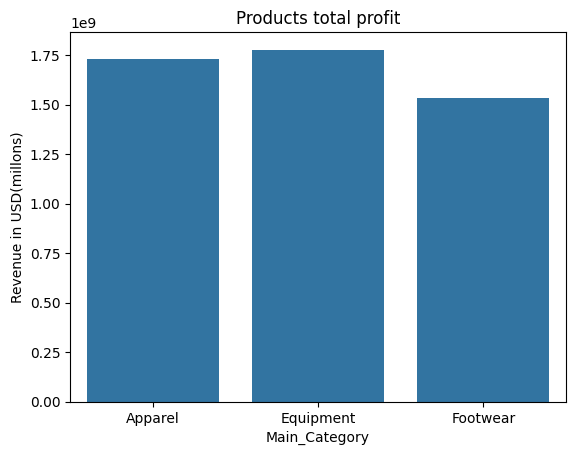

In [26]:
#Plot of total revenue per category
revenue_per_category = df.groupby("Main_Category")["Revenue_USD"].sum()
print(revenue_per_category)
revenue_plot = sb.barplot(revenue_per_category)
revenue_plot.set_title("Products total profit")
revenue_plot.set_ylabel("Revenue in USD(millons)")




Using the Seaborn library, we will make a scatterplot to see the distribution of sales in different months of the year


As we can see, the month with the highest number of sales was November,while the other months reach a lookalike result.
We personalize our scatterplot to be able to select the months we want to know their results.

First, we will abbreviate the months names to work with a more flexible format.

### Rename months names for better reading

In [74]:
df = df.replace({"November":"Nov","January":"Jan","October":"Oct","December":"Dec","May":"May","September":"Sep","August":"Aug","February":"Feb"})

### Barplot of total units sold for each month, differentiated by color.

Text(0, 0.5, 'Units sold')

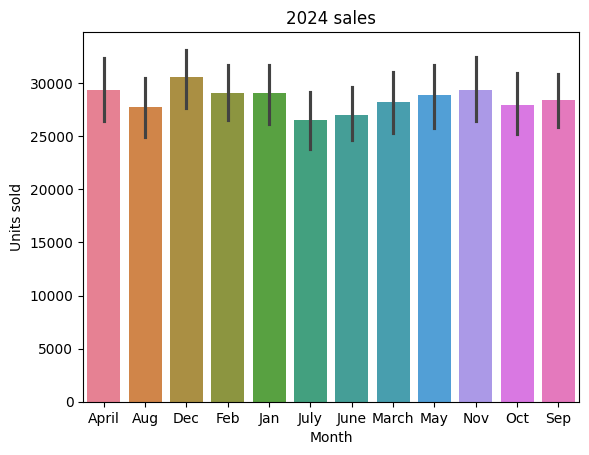

In [54]:
bar_sales = sb.barplot(data=df,x="Month",y="Units_Sold",hue="Month",fill=True)
bar_sales.set_title("2024 sales")
bar_sales.set_ylabel("Units sold")


There were not significant changes related to sales during 2024

The maximum sales amount was registered in December, while the lowest amount of sales was registered in July.

In average, Nike earned 5039576 dollars.

In [51]:
average_nike_sales = df["Revenue_USD"].mean()
print(np.round(average_nike_sales))

5039576.0


Nike has registered different amount of sales for each category in differents countries.

We create a comparison of sales performance for each country and category.

In [76]:
df.groupby("Region")["Units_Sold"].count()

Region
America         147
Eur             133
Grea_China      161
India           145
Japan           144
So_east_Asia    124
Sou_Korea       146
Name: Units_Sold, dtype: int64